In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/job-market(3).csv')
df.head()

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType
0,37404348.0,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0.0,30.0,NaN
1,37404337.0,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0.0,30.0,NaN
2,37404356.0,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07T00:00:00.000Z,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0.0,30.0,NaN
3,37404330.0,Team member - Belrose,Anaconda Group Pty Ltd,2018-10-07T00:00:00.000Z,Gosford & Central Coast,NaN,Retail & Consumer Products,Retail Assistants,Bring it on - do you love the great outdoors a...,NaN,0.0,30.0,NaN
4,37404308.0,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07T00:00:00.000Z,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,"We are seeking highly articulate, enthusiastic...",NaN,0.0,30.0,NaN


In [25]:
df.dtypes

Id                   float64
Title                 object
Company               object
Date                  object
Location              object
Area                  object
Classification        object
SubClassification     object
Requirement           object
FullDescription       object
LowestSalary         float64
HighestSalary        float64
JobType               object
dtype: object

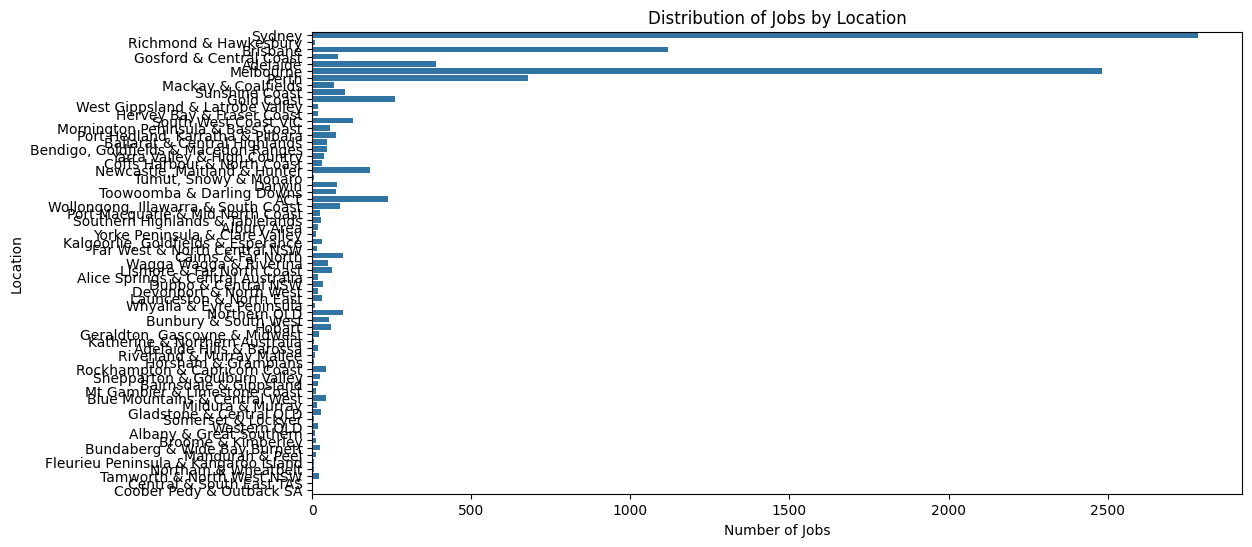

In [26]:
%matplotlib inline
df_filtered = df[df['Location'].map(df['Location'].value_counts()) > 0]

plt.figure(figsize=(12, 6))
sns.countplot(data=df_filtered, y='Location')
plt.title('Distribution of Jobs by Location')
plt.xlabel('Number of Jobs')
plt.ylabel('Location')
plt.show()


In [27]:

#create dataframe for salary ranges
min_salary = df['LowestSalary'].min()
max_salary = df['HighestSalary'].max()

# Determine the range width for the salary bins
# You can adjust the bin size as needed
bin_size = 5  # This sets the bin size to 50,000

# Create salary bins based on the minimum and maximum salaries
bins = range(int(min_salary), int(max_salary) + bin_size, bin_size)

# Create labels for the salary ranges
labels = [f"{b}-{b+bin_size-1}" for b in bins[:-1]]

# Create a new column 'SalaryRange' with the appropriate salary range for each job
df['SalaryRange'] = pd.cut(df['LowestSalary'], bins=bins, labels=labels)

# Group by the 'SalaryRange' column and count the number of job posts
salary_counts = df['SalaryRange'].value_counts().reset_index()

# Rename the columns for clarity
salary_counts.columns = ['SalaryRange', 'JobPosts']




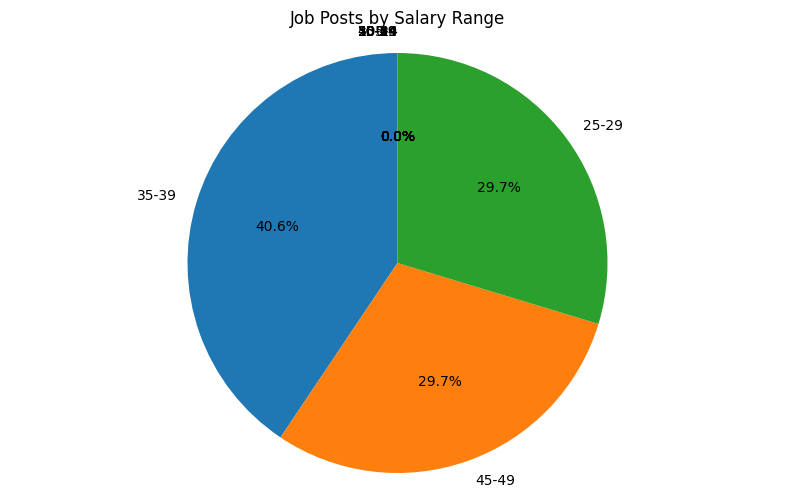

In [28]:
#salary ranges plot
plt.figure(figsize=(10, 6))
plt.pie(salary_counts['JobPosts'], labels=salary_counts['SalaryRange'], autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Job Posts by Salary Range')
plt.show()


In [29]:
#OPTIONAL

locationDf = df[df['Location'].isna()==False]
locationDf = locationDf.groupby('Location').count()
locationDf['Location'] = locationDf.index
locationDf['Count'] = locationDf["Id"]
locationDf.head()

,Id,Title,Company,Date,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,SalaryRange,Location,Count
Location,,,,,,,,,,,,,,,
ACT,238,238,235,238,0,238,238,238,235,238,238,236,160,ACT,238
Adelaide,390,390,356,390,0,390,390,390,374,390,390,374,256,Adelaide,390
Adelaide Hills & Barossa,19,19,18,19,0,19,19,19,19,19,19,19,16,Adelaide Hills & Barossa,19
Albany & Great Southern,10,10,10,10,0,10,10,10,10,10,10,10,5,Albany & Great Southern,10
Albury Area,19,19,18,19,0,19,19,19,19,19,19,19,15,Albury Area,19


<ipython-input-30-3f33b9d103fb>:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap("coolwarm")


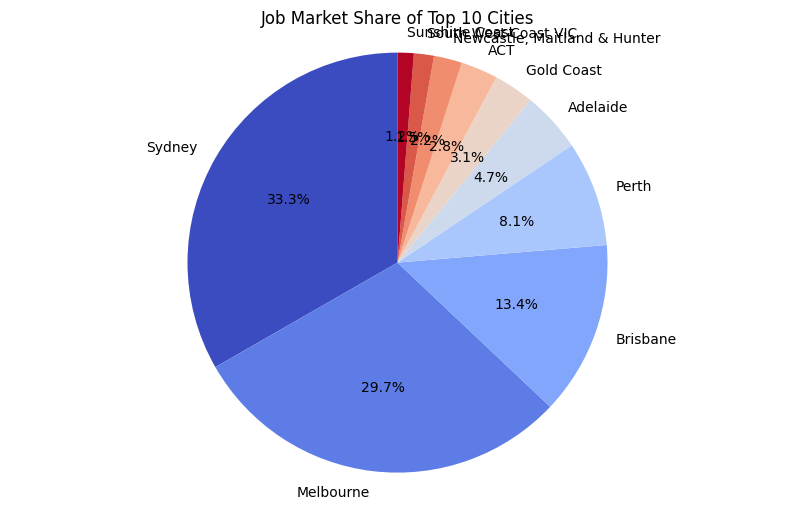

In [30]:
#OPTIONAL

%matplotlib inline
# Pie char for job market share of cities
# Get the top 10 cities with the most job postings
top_cities = locationDf.sort_values(by="Count", ascending=False).head(10)

# Create a colormap
cmap = cm.get_cmap("coolwarm")

# Create the pie chart
plt.figure(figsize=(10, 6))
plt.pie(
    top_cities["Count"],
    labels=top_cities["Location"],
    autopct="%1.1f%%",
    startangle=90,
    colors=[cmap(i) for i in np.linspace(0, 1, len(top_cities))],
)

# Add a title and show the plot
plt.title("Job Market Share of Top 10 Cities")
plt.axis("equal")  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()



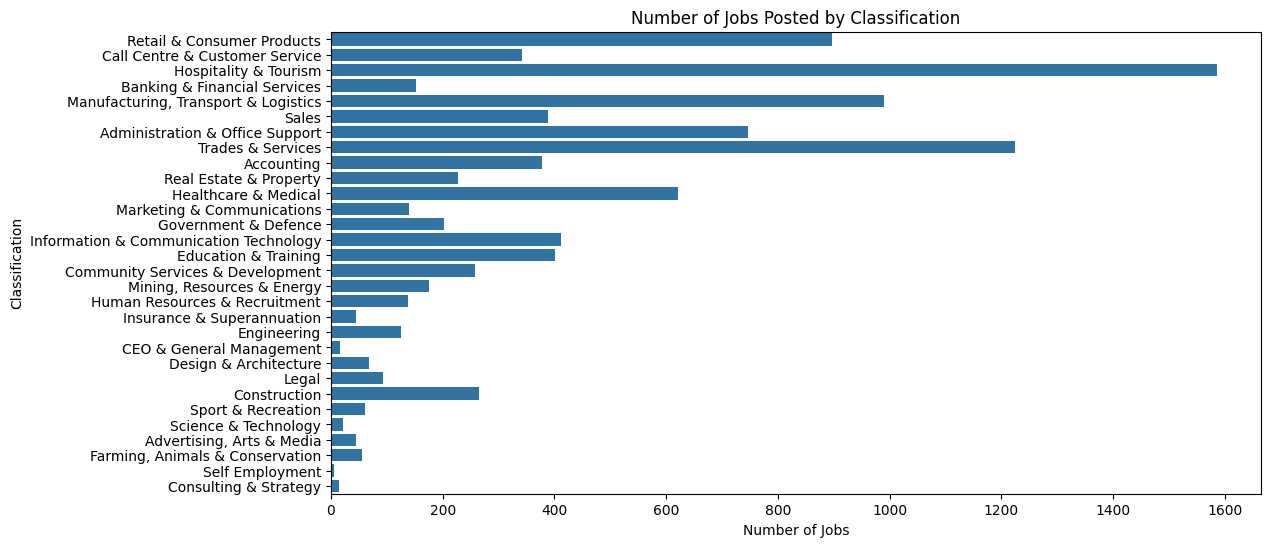

In [31]:
# Create a bar chart showing the number of jobs posted per classification
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='Classification')
plt.title('Number of Jobs Posted by Classification')
plt.xlabel('Number of Jobs')
plt.ylabel('Classification')
plt.show()

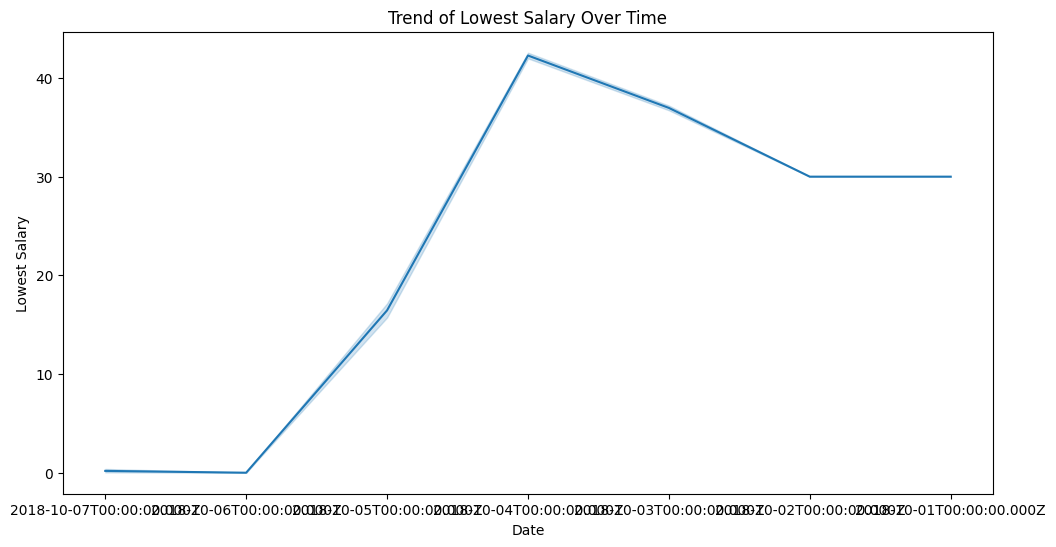

In [32]:
# Create a line chart showing the trend of lowest salary over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date', y='LowestSalary')
plt.title('Trend of Lowest Salary Over Time')
plt.xlabel('Date')
plt.ylabel('Lowest Salary')
plt.show()